In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))

In [34]:
df1 <- read.table("../../../reports/Master Table/RESULTS_FDR_LASTLEVELONLY_v2.TAB",header=TRUE)
gene <- read.csv("../../../../PNAS/DATA/CCNA_ref.csv",header=TRUE,fill=TRUE)
head(gene)

,locus_tag,cc_tag,geneID,protein_id,description
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCNA_00001,CC_0001,NA,YP_002515376.1,ATP/GTP-binding protein
2,CCNA_00002,CC_0002,NA,YP_002515377.1,septum formation protein Maf
3,CCNA_00003,CC_0003,NA,YP_002515378.1,shikimate 5-dehydrogenase
4,CCNA_00004,CC_0004,NA,YP_002515379.1,dephospho-CoA kinase
5,CCNA_00005,CC_0005,dnaQ,NA,NA
6,CCNA_00006,CC_0006,NA,YP_002515381.1,enoyl-CoA hydratase


In [35]:
df <- df1%>%select(locus_tag,strain,condition,slevel,locus_tag,Median_UC,Median_TC)%>%unite(title,condition, slevel, sep = ":", remove = FALSE)
df$title <- gsub("DLON","LON",df$title)
df$title <- gsub("dnak-dnaJ","dnaKJ-NI",df$title)
df$title <- gsub("DCLPA","CLPA",df$title)
df$title <- gsub("DCLPB","CLPB",df$title)
df$title <- gsub("wild-type","WT",df$title)
df$title <- gsub("canavanine","CN",df$title)
df$title <- gsub("oxidative-peroxide","OS",df$title)
df$title <- gsub("heat","HT",df$title)
df$title <- gsub("HIGH","H",df$title)
df$title <- gsub("MEDIUM","M",df$title)
df$title <- gsub("LOW","L",df$title)
df <- df%>%select(title,locus_tag,Median_UC,Median_TC,strain)%>%dplyr::rename("stress"="title")

In [21]:
head(df)

,stress,locus_tag,Median_UC,strain
,<chr>,<chr>,<dbl>,<chr>
1,CN:H,CCNA_00001,0,DCLPA
2,CN:H,CCNA_00002,42,DCLPA
3,CN:H,CCNA_00003,30,DCLPA
4,CN:H,CCNA_00004,0,DCLPA
5,CN:H,CCNA_00005,0,DCLPA
6,CN:H,CCNA_00006,6,DCLPA


In [36]:
ord_slevel <- c("HT:L","HT:M","HT:H","CN:L","CN:M","CN:H","OS:L","OS:M","OS:H")
df2<- df%>%mutate(stress=fct_relevel(stress,ord_slevel))

In [38]:
plot1 <- ggplot(df2,aes(x=stress, y=Median_UC, fill=factor(strain))) +
  geom_boxplot() +ggpubr::theme_classic2()+ylab(" Median Unique Insertion Counts")

In [43]:
plot2 <- ggplot(df2,aes(x=stress, y=Median_TC, fill=factor(strain))) +
  geom_boxplot() +ggpubr::theme_classic2()+ylab(" Median Total Insertion Counts")+ylim(0,10000)

Warning message:
"Removed 236 rows containing non-finite values (`stat_boxplot()`)."


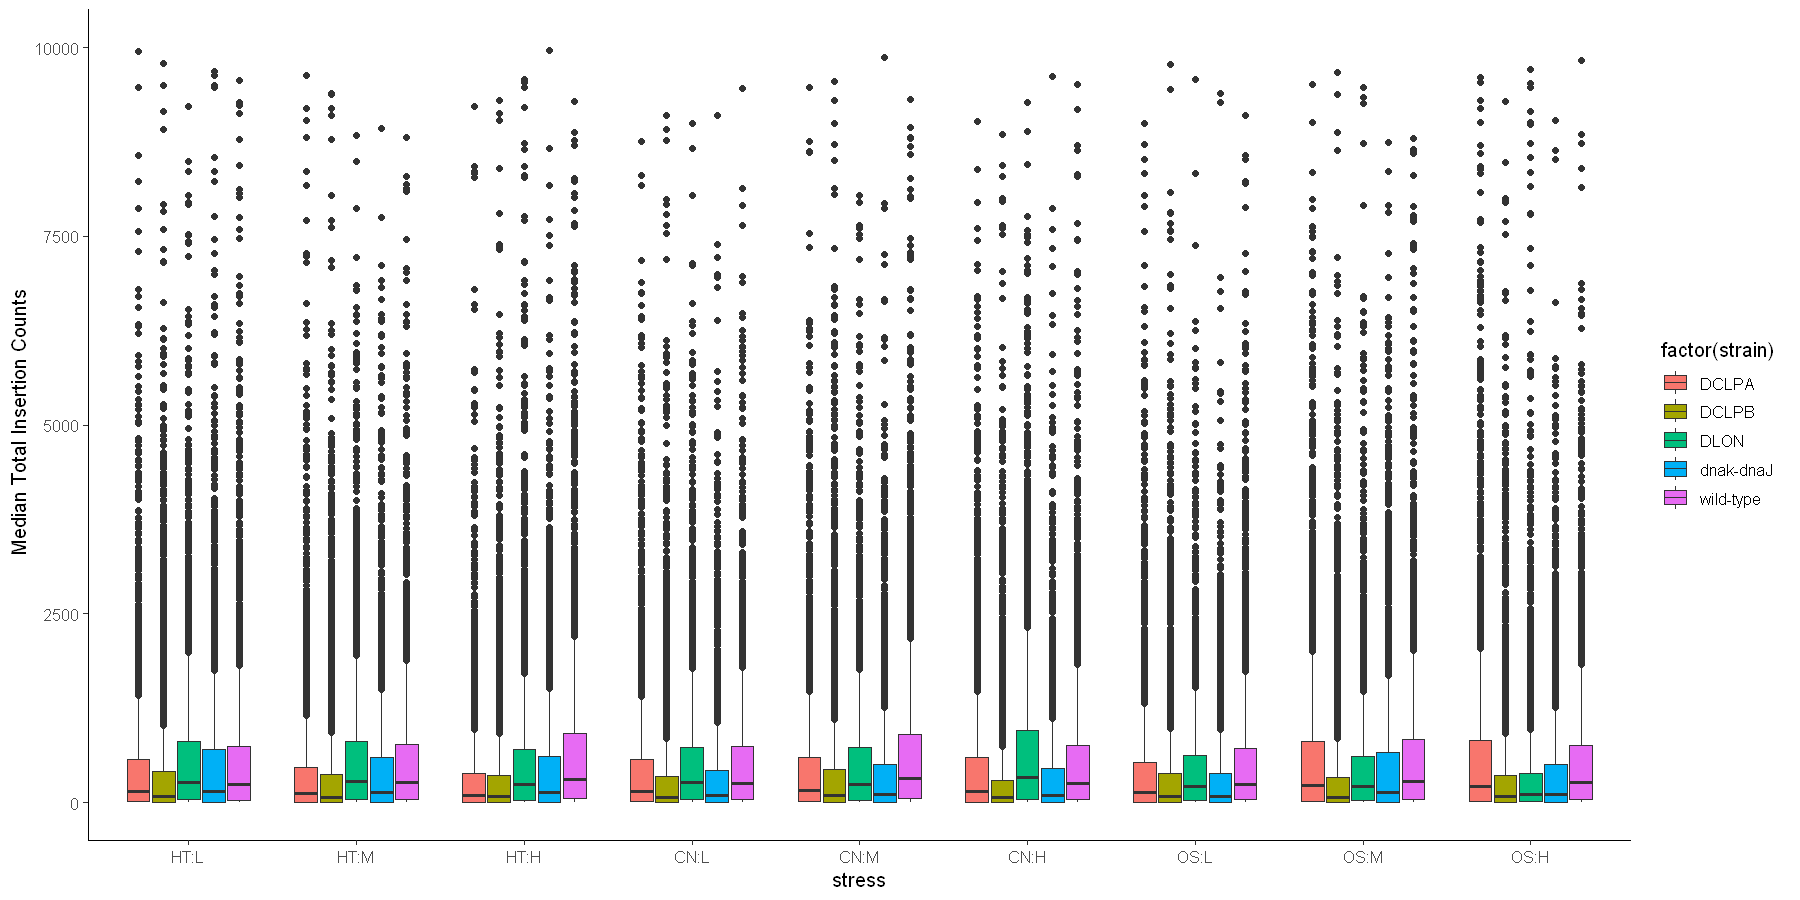

In [44]:
plot2

In [45]:
ggsave(filename = "../../../../PNAS/FIGURES/Suppl Fig/TC_plot.pdf", device = "pdf",  plot = plot2, width = 15, height =10 , dpi = 300, units = "in")

Warning message:
"Removed 236 rows containing non-finite values (`stat_boxplot()`)."


In [46]:
ggsave(filename = "../../../../PNAS/FIGURES/Suppl Fig/UC_plot.pdf", device = "pdf",  plot = plot1, width = 15, height =10 , dpi = 300, units = "in")

In [ ]:
########

In [56]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(require(reshape)))
library("egg")
library("grid")

Warning message:
"package 'egg' was built under R version 4.2.2"
Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 4.2.1"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [57]:
TC <- read.table("../../../../knockoff/DataAndCode/TC_mid_batchcorrected_dclpb_included.tsv",header=TRUE)
UC <-  read.table("../../../../knockoff/DataAndCode/UC_mid_batchcorrected_dclpb_included.tsv",header=TRUE)
df_merged <- merge(TC,UC,by=c("locus_tag","strain","condition","slevel","rep","batch","time"))
colnames(df_merged) <- c("locus_tag","strain","condition","slevel","rep","batch","time","tncnt_TC","Librarysize_TC","tncnt_UC","Librarysize_UC")

In [58]:
options(repr.plot.width=9, repr.plot.height=6)
b = c(0,5,10,50,100,500,1000,2500)
a=c(1,100,200,500,1000,25000)
p1 <- ggplot(df_merged, aes(x = tncnt_TC)) + geom_histogram(colour = 4, fill = "white", binwidth=50)+scale_y_sqrt(labels = b, breaks = b,limits=c(0,2500))+ scale_x_continuous(breaks = a, labels = a)+
theme_bw() +theme(panel.grid.minor=element_blank(), panel.grid.major=element_blank()) +
ylab("Frequency")+xlab("Total Counts")+theme_article()+ggtitle("TC Histogram")

Warning message:
"Removed 214 rows containing missing values (`geom_bar()`)."


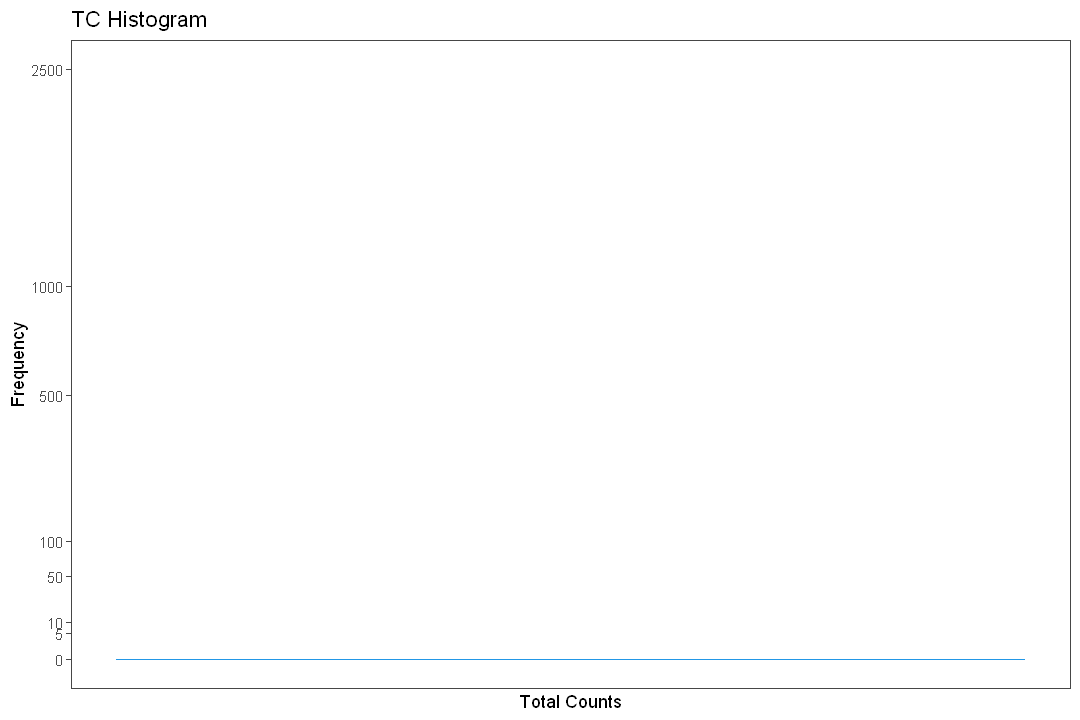

In [59]:
p1

In [53]:
max(df_tc$N)

[1] 7758461

In [51]:
df_uc <- read.table("../../../../knockoff/DataAndCode/UC_mid_batchcorrected_dclpb_included.tsv",header=TRUE)
head(df_uc,3)

,locus_tag,strain,condition,slevel,rep,batch,time,N,tncnt
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,CCNA_00001,DCLPA,canavanine,HIGH,1,2,24,62299,0
2,CCNA_00002,DCLPA,canavanine,HIGH,1,2,24,62299,53
3,CCNA_00003,DCLPA,canavanine,HIGH,1,2,24,62299,30


In [52]:
max(df_uc$N)

[1] 336157